In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [27]:
dataset1 = pd.read_csv('/content/drive/MyDrive/datasets/FinalDataset/chatGPT_Updated_Project.csv')

In [28]:
dataset1.head()

,Unnamed: 0,Date,Tweet,User,UserCreated,UserVerified,UserFollowers,Retweets,Likes,Location,Description,Processed_Tweets
0,3.0,2023-04-08,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,tubeblogger,2013-06-25 01:42:59+00:00,False,312.0,0.0,0.0,The Internet,"Exploring the Best Of The Web. Tech, Games, Ar...",openai’s gpt-4 just got supercharged!
1,4.0,2023-04-08,"""Classical art"" is struggling - not changed th...",majorradic,2011-12-12 01:29:15+00:00,False,522.0,0.0,2.0,Beograd Navodni,Mediji i milosrdje\n\n ...,"""classical art"" is struggling - not changed th..."
2,5.0,2023-04-08,Alibaba invites businesses to trial 'ChatGPT r...,gadgetsnow,2010-07-29 10:32:28+00:00,True,90392.0,0.0,0.0,New Delhi,The official technology news website of The Ti...,alibaba invites businesses to trial 'chatgpt r...
3,6.0,2023-04-08,Trying to stop students from using #AI and #ch...,Sherab_Taye,2010-05-10 12:40:40+00:00,False,338.0,0.0,0.0,World,Musician // Thinker // Metaphysical Dandy // f...,trying to stop students from using and is like...
4,7.0,2023-04-08,I Asked ChatGPT's AI Chatbot How Can I Earn Cr...,cryptoccentral,2023-01-27 00:12:12+00:00,False,1.0,0.0,2.0,United States,Get the latest updates and insights on the cry...,i asked chatgpt's ai chatbot how can i earn cr...


In [29]:
dataset2 = pd.read_csv('/content/drive/MyDrive/datasets/FinalDataset/gptDataBertPredictedLabel.csv')

In [30]:
dataset2.head()

,Unnamed: 0,Processed_Tweets,Vader_Polarity,Blob_Polarity,predicted_label
0,0,openais gpt4 just got supercharged ai chatgpt,0.0000,0.0,2
1,1,classical art is struggling not changed the fa...,-0.2500,0.2,2
2,2,alibaba invites businesses to trial chatgpt ri...,0.0000,0.0,2
3,3,trying to stop students from using ai and chat...,-0.2263,0.1,2
4,4,i asked chatgpts ai chatbot how can i earn cry...,0.0000,0.0,0


In [31]:
len(dataset1['Date'])

362566

In [32]:
len(dataset2['Processed_Tweets'])

362566

In [33]:
dataset2 = pd.concat([dataset2, dataset1['Date']], axis=1)

In [34]:
dataset2.head()

,Unnamed: 0,Processed_Tweets,Vader_Polarity,Blob_Polarity,predicted_label,Date
0,0,openais gpt4 just got supercharged ai chatgpt,0.0000,0.0,2,2023-04-08
1,1,classical art is struggling not changed the fa...,-0.2500,0.2,2,2023-04-08
2,2,alibaba invites businesses to trial chatgpt ri...,0.0000,0.0,2,2023-04-08
3,3,trying to stop students from using ai and chat...,-0.2263,0.1,2,2023-04-08
4,4,i asked chatgpts ai chatbot how can i earn cry...,0.0000,0.0,0,2023-04-08


In [35]:
dataset2.columns

Index(['Unnamed: 0', 'Processed_Tweets', 'Vader_Polarity', 'Blob_Polarity',
       'predicted_label', 'Date'],
      dtype='object')

# BERT prediction's line graph

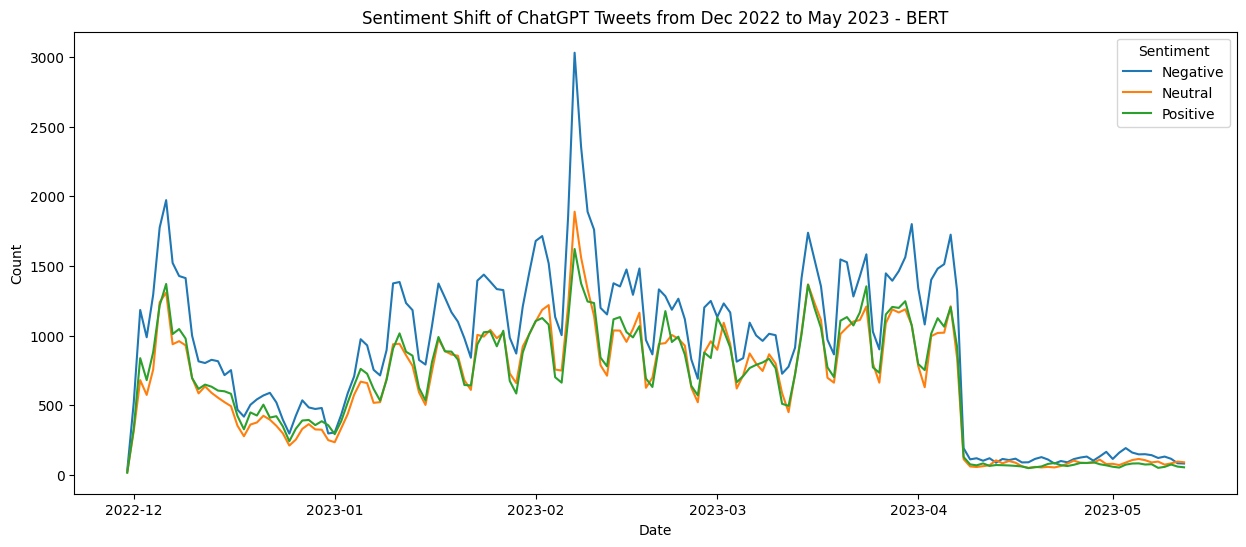

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping the labels to corresponding sentiments values
dataset2['bert_sentiment'] = dataset2['predicted_label'].map({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

# Converting 'Date' column to datetime
dataset2['Date'] = pd.to_datetime(dataset2['Date'])

# Plotting sentiment over time
# Creating a dataframe with sentiment count for each day
sentiment_count = dataset2.resample('D', on='Date')['bert_sentiment'].value_counts().unstack().fillna(0)
sentiment_count.reset_index(inplace=True)
sentiment_count = sentiment_count.melt('Date', var_name='Sentiment', value_name='Count')

# plotting line graph
plt.subplots(1, 1, figsize=(15, 6))
sns.lineplot(data=sentiment_count, hue='Sentiment', y='Count', x='Date')
plt.title('Sentiment Shift of ChatGPT Tweets from Dec 2022 to May 2023 - BERT')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


In [37]:
dataset2.head()

,Unnamed: 0,Processed_Tweets,Vader_Polarity,Blob_Polarity,predicted_label,Date,bert_sentiment
0,0,openais gpt4 just got supercharged ai chatgpt,0.0000,0.0,2,2023-04-08,Negative
1,1,classical art is struggling not changed the fa...,-0.2500,0.2,2,2023-04-08,Negative
2,2,alibaba invites businesses to trial chatgpt ri...,0.0000,0.0,2,2023-04-08,Negative
3,3,trying to stop students from using ai and chat...,-0.2263,0.1,2,2023-04-08,Negative
4,4,i asked chatgpts ai chatbot how can i earn cry...,0.0000,0.0,0,2023-04-08,Neutral


In [38]:
# threshold values
positive_threshold = 0.1
negative_threshold = -0.1

# Categorizing TextBlob polarity scores
dataset2['Blob_Sentiment'] = pd.cut(dataset2['Blob_Polarity'], bins=[float('-inf'), negative_threshold, positive_threshold, float('inf')],
                                    labels=['Negative', 'Neutral', 'Positive'], right=False)

In [39]:
# threshold values
positive_threshold = 0.05
negative_threshold = -0.05

# Categorizing VADER polarity scores
dataset2['Vader_Sentiment'] = pd.cut(dataset2['Vader_Polarity'], bins=[float('-inf'), negative_threshold, positive_threshold, float('inf')],
                                     labels=['Negative', 'Neutral', 'Positive'], right=False)



In [40]:
dataset2.head()

,Unnamed: 0,Processed_Tweets,Vader_Polarity,Blob_Polarity,predicted_label,Date,bert_sentiment,Blob_Sentiment,Vader_Sentiment
0,0,openais gpt4 just got supercharged ai chatgpt,0.0000,0.0,2,2023-04-08,Negative,Neutral,Neutral
1,1,classical art is struggling not changed the fa...,-0.2500,0.2,2,2023-04-08,Negative,Positive,Negative
2,2,alibaba invites businesses to trial chatgpt ri...,0.0000,0.0,2,2023-04-08,Negative,Neutral,Neutral
3,3,trying to stop students from using ai and chat...,-0.2263,0.1,2,2023-04-08,Negative,Positive,Negative
4,4,i asked chatgpts ai chatbot how can i earn cry...,0.0000,0.0,0,2023-04-08,Neutral,Neutral,Neutral


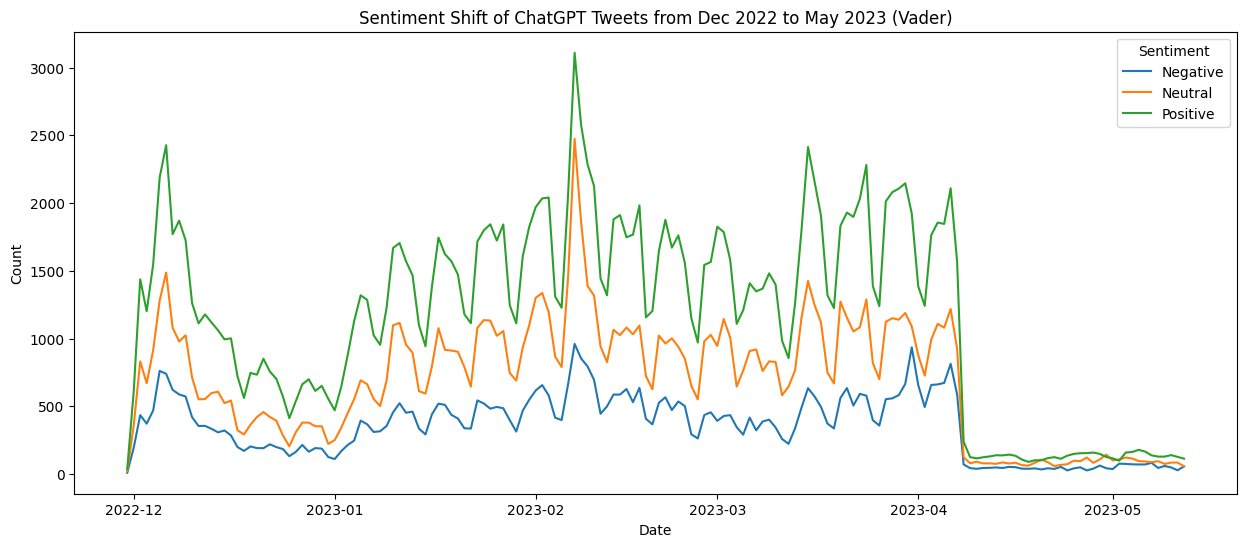

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset2['Date'] = pd.to_datetime(dataset2['Date'])

# Plotting sentiment over index
# Sentiment with time
# Creating a dataframe with sentiment count for each day
sentiment_count = dataset2.resample('D', on='Date')['Vader_Sentiment'].value_counts().unstack()
sentiment_count.reset_index(inplace=True)
sentiment_count = sentiment_count.melt('Date', var_name='Sentiment', value_name='Count')

# plotting line graph
plt.subplots(1,1,figsize=(15,6))
sns.lineplot(data=sentiment_count, hue='Sentiment', y='Count', x='Date')
plt.title('Sentiment Shift of ChatGPT Tweets from Dec 2022 to May 2023 (Vader)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [42]:
dataset2.head()

,Unnamed: 0,Processed_Tweets,Vader_Polarity,Blob_Polarity,predicted_label,Date,bert_sentiment,Blob_Sentiment,Vader_Sentiment
0,0,openais gpt4 just got supercharged ai chatgpt,0.0000,0.0,2,2023-04-08,Negative,Neutral,Neutral
1,1,classical art is struggling not changed the fa...,-0.2500,0.2,2,2023-04-08,Negative,Positive,Negative
2,2,alibaba invites businesses to trial chatgpt ri...,0.0000,0.0,2,2023-04-08,Negative,Neutral,Neutral
3,3,trying to stop students from using ai and chat...,-0.2263,0.1,2,2023-04-08,Negative,Positive,Negative
4,4,i asked chatgpts ai chatbot how can i earn cry...,0.0000,0.0,0,2023-04-08,Neutral,Neutral,Neutral


# Blob Sentiment line graph

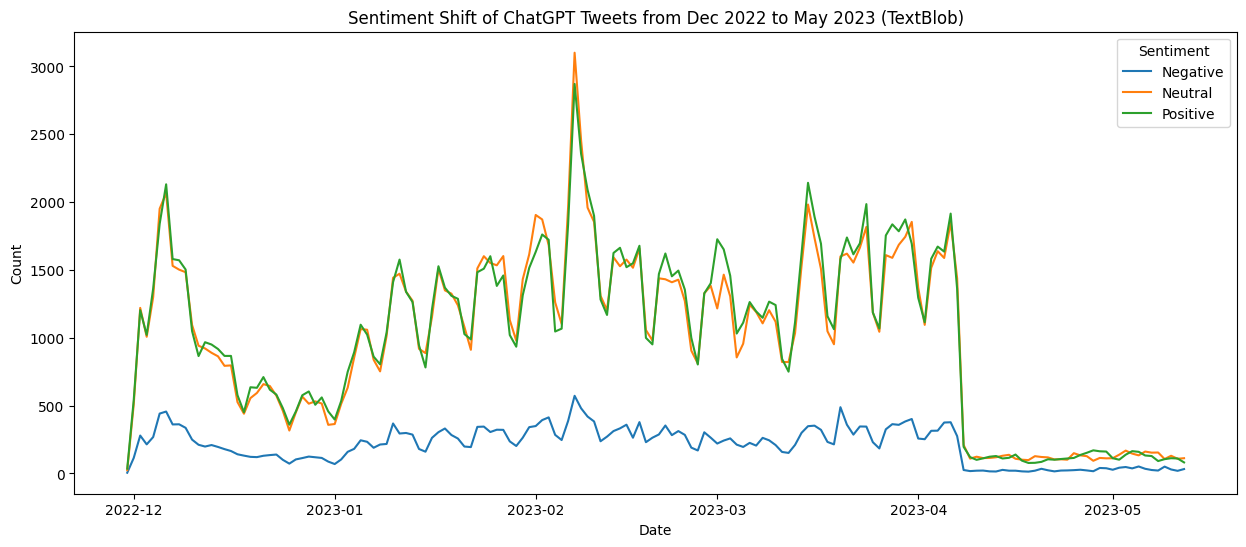

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset2['Date'] = pd.to_datetime(dataset2['Date'])

# Plotting sentiment over index
# Sentiment with time
# Creating a dataframe with sentiment count for each day
sentiment_count = dataset2.resample('D', on='Date')['Blob_Sentiment'].value_counts().unstack()
sentiment_count.reset_index(inplace=True)
sentiment_count = sentiment_count.melt('Date', var_name='Sentiment', value_name='Count')

plt.subplots(1,1,figsize=(15,6))
sns.lineplot(data=sentiment_count, hue='Sentiment', y='Count', x='Date')
plt.title('Sentiment Shift of ChatGPT Tweets from Dec 2022 to May 2023 (TextBlob)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [44]:
dataset2.head()

,Unnamed: 0,Processed_Tweets,Vader_Polarity,Blob_Polarity,predicted_label,Date,bert_sentiment,Blob_Sentiment,Vader_Sentiment
0,0,openais gpt4 just got supercharged ai chatgpt,0.0000,0.0,2,2023-04-08,Negative,Neutral,Neutral
1,1,classical art is struggling not changed the fa...,-0.2500,0.2,2,2023-04-08,Negative,Positive,Negative
2,2,alibaba invites businesses to trial chatgpt ri...,0.0000,0.0,2,2023-04-08,Negative,Neutral,Neutral
3,3,trying to stop students from using ai and chat...,-0.2263,0.1,2,2023-04-08,Negative,Positive,Negative
4,4,i asked chatgpts ai chatbot how can i earn cry...,0.0000,0.0,0,2023-04-08,Neutral,Neutral,Neutral


# All models performance comparison of sentiment prediction

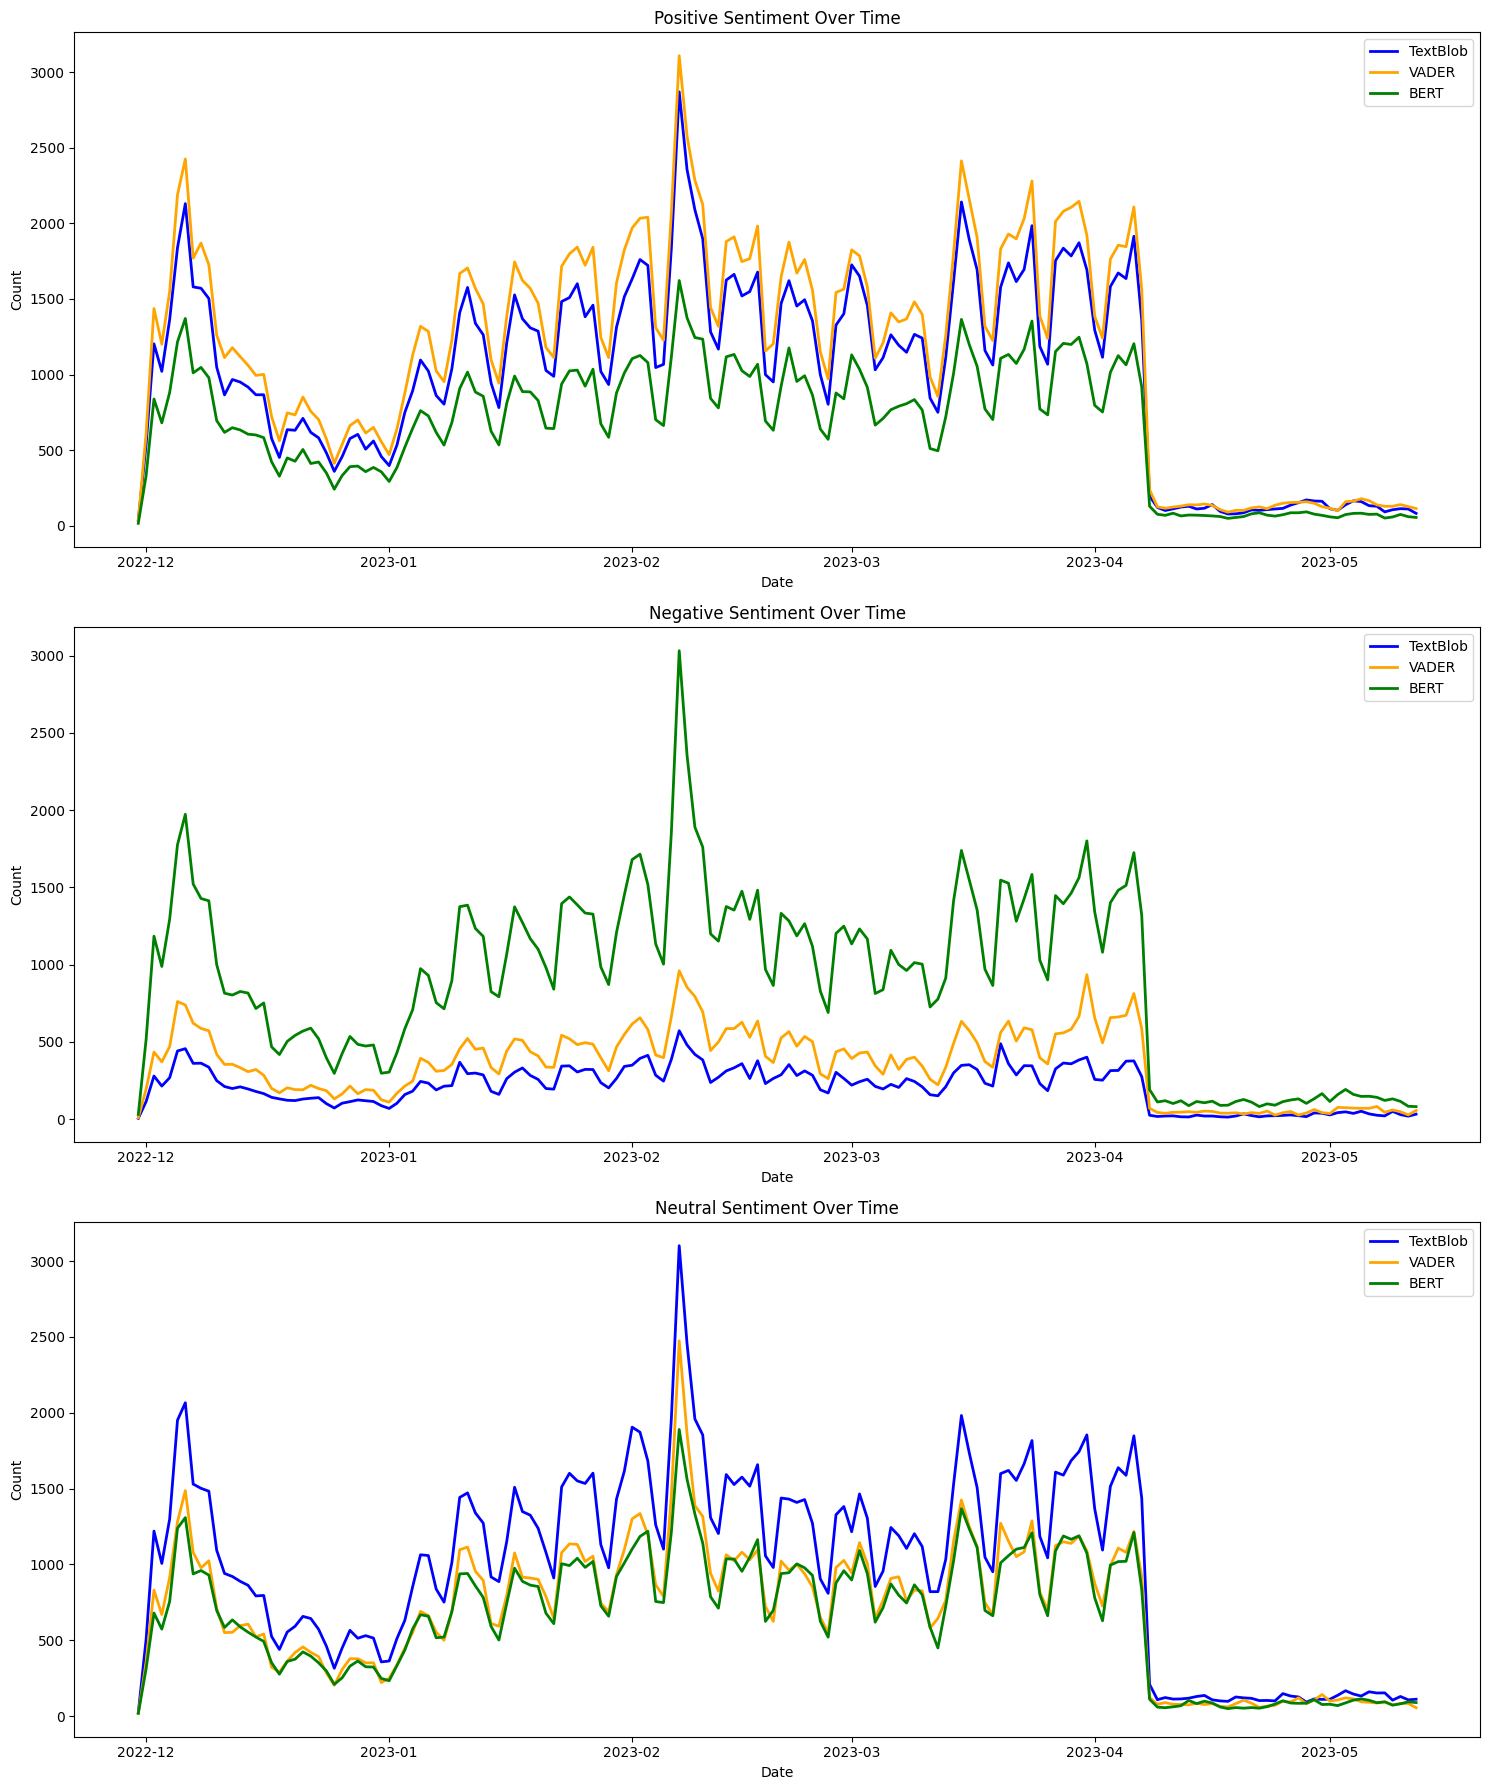

In [45]:
# Melting the dataset for plotting
sentiment_count_blob = dataset2.resample('D', on='Date')['Blob_Sentiment'].value_counts().unstack().reset_index().melt('Date', var_name='Sentiment', value_name='Count')
sentiment_count_vader = dataset2.resample('D', on='Date')['Vader_Sentiment'].value_counts().unstack().reset_index().melt('Date', var_name='Sentiment', value_name='Count')
sentiment_count_bert = dataset2.resample('D', on='Date')['bert_sentiment'].value_counts().unstack().reset_index().melt('Date', var_name='Sentiment', value_name='Count')

# Plotting separate graphs for positive, negative, and neutral sentiments
plt.figure(figsize=(15, 18))

# Plotting positive sentiments
plt.subplot(3, 1, 1)
sns.lineplot(data=sentiment_count_blob[sentiment_count_blob['Sentiment'] == 'Positive'], x='Date', y='Count', color='blue', label='TextBlob', linewidth=2) # plotting Blob positive sentiment
sns.lineplot(data=sentiment_count_vader[sentiment_count_vader['Sentiment'] == 'Positive'], x='Date', y='Count', color='orange', label='VADER', linewidth=2) # plotting Vader positive sentiments
sns.lineplot(data=sentiment_count_bert[sentiment_count_bert['Sentiment'] == 'Positive'], x='Date', y='Count', color='green', label='BERT', linewidth=2) # plotting BERT's positive sentiments
plt.title('Positive Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Plotting negative sentiments
plt.subplot(3, 1, 2)
sns.lineplot(data=sentiment_count_blob[sentiment_count_blob['Sentiment'] == 'Negative'], x='Date', y='Count', color='blue', label='TextBlob', linewidth=2) # plotting Blob positive sentiment
sns.lineplot(data=sentiment_count_vader[sentiment_count_vader['Sentiment'] == 'Negative'], x='Date', y='Count', color='orange', label='VADER', linewidth=2) # plotting Vader positive sentiments
sns.lineplot(data=sentiment_count_bert[sentiment_count_bert['Sentiment'] == 'Negative'], x='Date', y='Count', color='green', label='BERT', linewidth=2) # plotting BERT's positive sentiments
plt.title('Negative Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Plotting neutral sentiments
plt.subplot(3, 1, 3)
sns.lineplot(data=sentiment_count_blob[sentiment_count_blob['Sentiment'] == 'Neutral'], x='Date', y='Count', color='blue', label='TextBlob', linewidth=2) # plotting Blob positive sentiment
sns.lineplot(data=sentiment_count_vader[sentiment_count_vader['Sentiment'] == 'Neutral'], x='Date', y='Count', color='orange', label='VADER', linewidth=2)  # plotting Vader positive sentiments
sns.lineplot(data=sentiment_count_bert[sentiment_count_bert['Sentiment'] == 'Neutral'], x='Date', y='Count', color='green', label='BERT', linewidth=2) # plotting BERT's positive sentiments
plt.title('Neutral Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
dataset2.head()

,Unnamed: 0,Processed_Tweets,Vader_Polarity,Blob_Polarity,predicted_label,Date,bert_sentiment,Blob_Sentiment,Vader_Sentiment
0,0,openais gpt4 just got supercharged ai chatgpt,0.0000,0.0,2,2023-04-08,Negative,Neutral,Neutral
1,1,classical art is struggling not changed the fa...,-0.2500,0.2,2,2023-04-08,Negative,Positive,Negative
2,2,alibaba invites businesses to trial chatgpt ri...,0.0000,0.0,2,2023-04-08,Negative,Neutral,Neutral
3,3,trying to stop students from using ai and chat...,-0.2263,0.1,2,2023-04-08,Negative,Positive,Negative
4,4,i asked chatgpts ai chatbot how can i earn cry...,0.0000,0.0,0,2023-04-08,Neutral,Neutral,Neutral


In [47]:
# dropping the numeric columns of the predictions.
dataset2.drop(columns=['Vader_Polarity'], inplace=True)
dataset2.drop(columns=['Blob_Polarity'], inplace=True)
dataset2.drop(columns=['predicted_label'], inplace=True)

In [48]:
dataset2.head()

,Unnamed: 0,Processed_Tweets,Date,bert_sentiment,Blob_Sentiment,Vader_Sentiment
0,0,openais gpt4 just got supercharged ai chatgpt,2023-04-08,Negative,Neutral,Neutral
1,1,classical art is struggling not changed the fa...,2023-04-08,Negative,Positive,Negative
2,2,alibaba invites businesses to trial chatgpt ri...,2023-04-08,Negative,Neutral,Neutral
3,3,trying to stop students from using ai and chat...,2023-04-08,Negative,Positive,Negative
4,4,i asked chatgpts ai chatbot how can i earn cry...,2023-04-08,Neutral,Neutral,Neutral


In [25]:
dataset2.to_csv('/content/drive/MyDrive/datasets/AllModelsPrediction.csv')